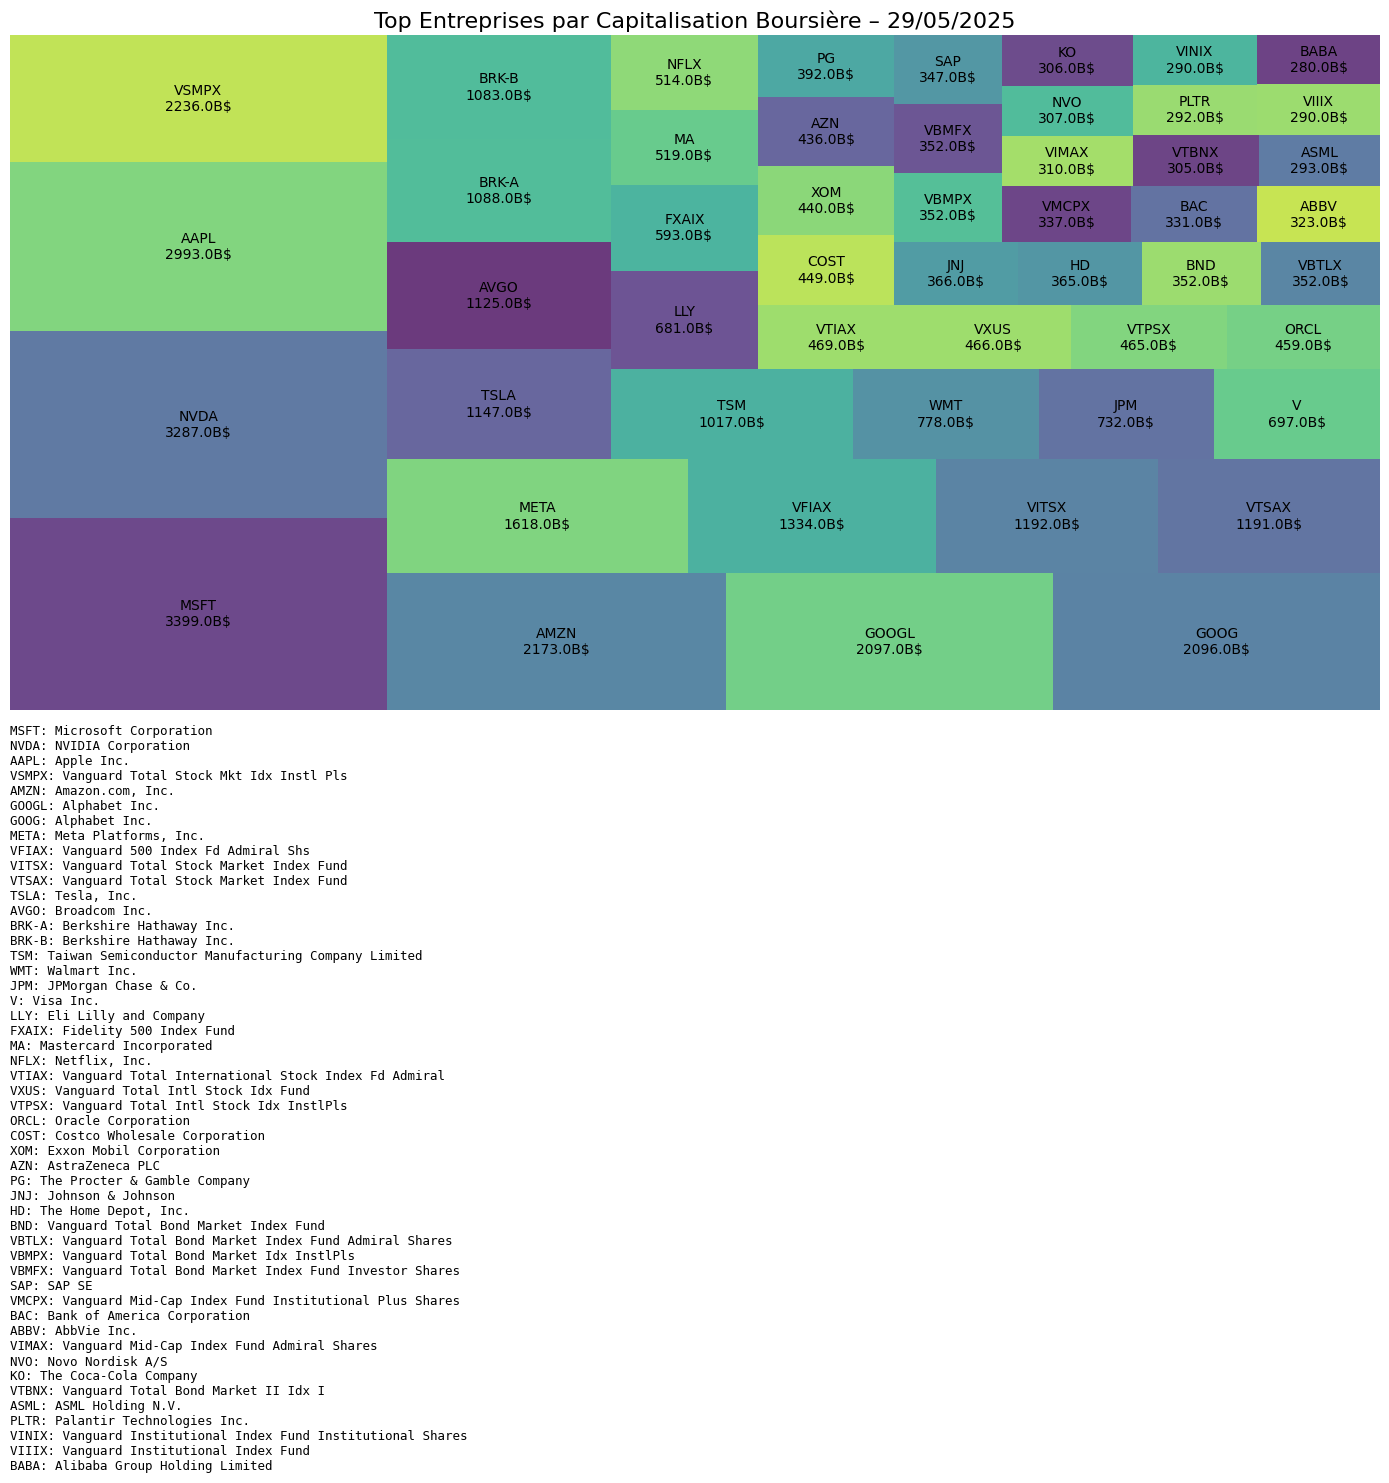

In [5]:

"""004_plot_stock_marketcap.py

Ce script permet de visualiser sous forme de treemap les capitalisations boursières
extraites à l'aide du script `003_top_stocks_marketcap.py`.

Requiert : matplotlib, squarify
"""

import json
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt
import squarify

def plot_stock_marketcap(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    labels = [f"{item['symbol']}\n{item['market_cap'] // 1e9:.1f}B$" for item in data]
    sizes = [item['market_cap'] for item in data]
    legend_items = [f"{item['symbol']}: {item['name']}" for item in data]

    date_str = json_path.stem.split('_')[0]
    try:
        parsed_date = datetime.strptime(date_str, "%y%m%d").strftime("%d/%m/%Y")
    except ValueError:
        parsed_date = ""

    plt.figure(figsize=(14, 15))
    ax1 = plt.subplot2grid((5, 1), (0, 0), rowspan=3)
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, ax=ax1)
    ax1.axis('off')
    ax1.set_title(f"Top Entreprises par Capitalisation Boursière – {parsed_date}", fontsize=16)

    ax2 = plt.subplot2grid((5, 1), (3, 0), rowspan=2)
    ax2.axis('off')
    legend_text = "\n".join(legend_items)
    ax2.text(0, 1, legend_text, va='top', fontsize=9, family='monospace')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Exemple : remplacer par un chemin réel si exécuté comme script
    path = Path("stock_data/market_data/250529_top_stock_history.json")
    plot_stock_marketcap(path)